# **PREDIKSI PERFORMA SISWA DALAM MATEMATIKA**

Proyek ini bertujuan untuk membangun dan membandingkan tiga klasifikasi biner untuk memprediksi kinerja siswa dalam Matematika. Data yang digunakan dikumpulkan dari **dua sekolah umum di Portugal selama tahun pelajaran 2005/06**, yang diambil dari **UCI Machine Learning Repository** (Cortez & Silva, 2008).

Fitur deskriptif terdiri dari **5 fitur numerik, 17 fitur nominal, dan 10 fitur ordinal**. **Target klasifikasi adalah variabel G3, yang merupakan nilai akhir siswa**. Nilai G3 berkisar antara 0 hingga 20, dimana 0 menunjukkan nilai terendah dan 20 menunjukkan nilai penuh. Dalam konteks klasifikasi biner, **nilai-nilai G3 yang lebih besar atau sama dengan 10 dianggap sebagai "pass (lulus)", sedangkan nilai yang lebih rendah dianggap sebagai "fail (gagal)"**.

## **I. Narasi**


Kami membangun tiga model klasifikasi, ***K-Nearest Neighbors (KNN)*, *Decision Trees (DT)*, dan *Naive Bayes (NB)***, untuk memprediksi apakah siswa lulus atau gagal dalam Matematika. Di bawah ini adalah gambaran dari langkah-langkah yang dilakukan:

1. Proses dimulai dengan memuat dataset dan membersihkan data kotor. Pada tahap ini kami menghapus data yang terduplikasi dan data yang memiliki missing value.

2. Langkah selanjutnya adalah mengubah format dataset. Fitur-fitur kategoris diubah menjadi fitur-fitur numerik, dan seluruh fitur deskriptif diukur menggunakan skala Min-Max. Selanjutnya, dataset dibagi menjadi dua bagian dengan rasio 70:30 untuk pelatihan dan pengujian.

3. Karena jumlah kolom fitur deskriptif yang besar setelah transformasi (yaitu 45 fitur deskriptif), kami memutuskan untuk menerapkan seleksi fitur sebelum melatih model. Kami memilih 10 fitur teratas berdasarkan metode Random Forest Importance dan F-Score. Kami membandingkan kinerja kedua metode seleksi fitur ini dan melanjutkan dengan yang memberikan hasil lebih baik untuk langkah pemodelan selanjutnya.

4. Setelah seleksi fitur, kami melatih model dengan mencari *hyperparameter* dalam *pipeline* dengan *5-fold repeated stratified cross-validation*. Proses ini dilakukan pada data pelatihan dengan fitur lengkap dan juga pada data pelatihan yang sama, tetapi hanya menggunakan 10 fitur teratas yang dipilih pada tahap sebelumnya. Stratifikasi diperlukan sepanjang pemodelan dan seleksi karena kelas target biner tidak seimbang.

5. Terakhir, kami memasang model terbaik yang diidentifikasi dari pencarian *hyperparameter* pada data uji dengan *5-fold repeated stratified cross-validation*. Kami membandingkan kinerja model dengan melihat nilai pada *metrik area under curve (AUC)*, dan kami mengintegrasikan metrik evaluasi lainnya, seperti *recall*, *presisi*, dan *F1-score*, untuk perbandingan yang komprehensif dan mendalam.

## **II. Data Preparation**

### *Loading Dataset*

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# sys.path.append('/content/drive/My Drive/Colab Notebooks/Autism')
PATH = '/content/drive/My Drive/Semester 5/MTFDS'

## Memuat dataset dari file CSV ke dalam DataFrame pandas bernama 'math'
math = pd.read_csv(PATH + "/student-mathematic.csv")

## Gunakan baris di bawah ini jika gagal memuat file csv
# math = pd.read_csv('student-mathematic.csv', sep=',')

math.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3.0,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
## Menampilkan dimensi dataset (jumlah baris dan kolom)
print(math.shape)

## Menampilkan nama kolom-kolom dalam dataset
math.columns.values

(410, 33)


array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

### *Remove Duplicated Data*

In [ ]:
## Menampilkan data yang terduplikasi
print(math[math.duplicated(keep=False)])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A   2.0     2  services  services   
391     MS   M   17       U     LE3       T   3.0     1  services  services   
392     MS   M   21       R     GT3       T   1.0     1     other     other   
393     MS   M   18       R     LE3       T   3.0     2  services     other   
394     MS   M   19       U     LE3       T   1.0     1     other   at_home   
395     MS   M   20       U     LE3       A   2.0     2  services  services   
396     MS   M   17       U     LE3       T   3.0     1  services  services   
397     MS   M   21       R     GT3       T   1.0     1     other     other   
398     MS   M   18       R     LE3       T   3.0     2  services     other   
399     MS   M   19       U     LE3       T   1.0     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4      

In [ ]:
## Menghapus baris yang merupakan duplikat dari dataset
math = math.drop_duplicates()

print(math[math.duplicated(keep=False)])

## Menampilkan dimensi dataset setelah menghapus duplikasi
print(math.shape)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]
(405, 33)


### *Remove Missing Values*

In [ ]:
## Menampilkan jumlah missing values untuk setiap kolom
math.isna().sum()

school        0
sex           1
age           0
address       2
famsize       2
Pstatus       2
Medu          1
Fedu          0
Mjob          3
Fjob          1
reason        1
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
## Menghapus semua baris yang memiliki missing values
math = math.dropna()

math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
print(math.shape)

(395, 33)


Sebagai hasil dari langkah-langkah di atas, dataset sekarang telah dibersihkan dari duplikasi dan missing values, sehingga menyisakan 395 data.

### *Transformasi Fitur Target*

Transformasi data merupakan proses mengubah data dari skala pengukuran data asli menjadi skala bentuk lain dengan tujuan untuk memperbaiki karakteristik data dan memudahkan analisis.

In [ ]:
# Mengubah nilai-nilai dalam kolom "G3" menjadi "pass" atau "fail"
math['target'] = math['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

# Menghapus kolom "G3" yang sudah tidak diperlukan
math.drop(columns=['G3'], inplace=True)

## Menampilkan dimensi dan nama kolom dataset setelah transformasi.
math.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'target'], dtype=object)

Fitur target yang awalnya bernama "G3" sekarang diubah namanya menjadi "target" dan diubah menjadi fitur kategoris biner  dengan dua tingkatan "pass" and "fail".

In [ ]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,fail
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,4,5,5,fail
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,10,7,8,pass
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,2,15,14,pass
4,GP,F,16,U,GT3,T,3.0,3,other,other,...,4,3,2,1,2,5,4,6,10,pass


### *Encoding Categorical Features*

Diperlukan langkah tambahan untuk mengubah fitur-fitur kategoris menjadi bentuk numerik sebelum dapat digunakan dalam algoritma Machine Learning menggunakan Scikit-learn. Fitur-fitur kategoris ini perlu di-"encode" agar bisa direpresentasikan dalam bentuk angka.

Sebelum kita melakukan encoding pada fitur target, kita perlu memisahkan fitur deskriptif dan fitur target dari dataset. Fitur target biasanya merupakan variabel yang ingin kita prediksi, sementara fitur deskriptif adalah variabel yang digunakan sebagai input untuk membuat prediksi.

In [ ]:
target = math['target']
data = math.drop(columns='target')

Dengan langkah ini, kita membuat dua DataFrame terpisah:

*   target yang berisi variabel target ('pass' atau 'fail').
*   data yang berisi fitur-fitur deskriptif tanpa fitur target.

Setelah itu, kita dapat melanjutkan untuk melakukan encoding pada fitur-fitur kategoris di dalam data. Encoding ini memungkinkan kita menggunakan algoritma Machine Learning yang memerlukan input dalam bentuk numerik. Salah satu cara umum untuk melakukan encoding adalah dengan menggunakan metode seperti One-Hot Encoding atau Label Encoding.

#### **Fitur Target**

In [ ]:
print(target.value_counts())

pass    265
fail    130
Name: target, dtype: int64


Dari hasil output, terlihat bahwa kelas target tidak seimbang, di mana jumlah "pass" (lulus) dua kali lipat dari jumlah "fail" (gagal).

Ketidakseimbangan ini dapat memengaruhi kinerja model Machine Learning, terutama jika model cenderung memprediksi kelas mayoritas.

Untuk mengatasi ketidakseimbangan ini, kita perlu mengganti nilai kelas target. Dalam contoh ini, kita mengganti nilai "pass" menjadi 1 dan "fail" menjadi 0.

In [ ]:
target = target.replace({'pass':1,'fail':0})
target.value_counts()

1    265
0    130
Name: target, dtype: int64

Setelah proses penggantian nilai, kita dapat melihat bahwa kelas target sekarang diwakili oleh nilai numerik, di mana 1 mewakili "pass" dan 0 mewakili "fail". Jumlah sampel untuk setiap kelas tetap sama, tetapi sekarang kita dapat menggunakan nilai-nilai ini dalam model Machine Learning yang memerlukan representasi numerik untuk target.

#### **Fitur Deskriptif Kategorikal**

Data kategorikal seringkali mencakup nilai dan pengamatan yang dapat dikategorikan atau dikelompokkan. Terdapat dua jenis fitur deskriptif kategorik dalam dataset.
*   Data Nominal
*   Data Ordinal

##### **Nominal:**

Data nominal adalah jenis data yang terdiri dari kategori-kategori yang **tidak dapat diurutkan atau diberi peringkat**. Contohnya angka 1 untuk wanita dan angka 0 untuk pria. Angka 0 dan 1 hanya melambangkan jenis kelamin saja, bukan sebuah tingkatan atau urutan jadi kita bisa mengubah labelnya, angka 1 untuk laki-laki dan angka 0 untuk perempuan.

In [ ]:
nominal_cols = data.columns[data.dtypes==object].tolist()
nominal_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Dalam dataset ini, terdapat 17 fitur nominal. Jenis-jenis fitur nominal ini adalah:
1. sex: binary - female or male
2. school: binary - Gabriel Pereira or Mousinho da Silveira
3. address: binary - urban or rural
4. Pstatus: binary - living together or apart
5. famsize: binary - ≤ 3 or > 3
6. schoolsup: binary - yes or no
7. famsup: binary - yes or no
8. activities: binary - yes or no
9. paidclass: binary - yes or no
10. internet: binary - yes or no
11. nursey: binary - yes or no
12. higher: binary - yes or no
13. romantic: binary - yes or no
14. guardian: 3 levels
15. reason: 4 levels
16. Mjob: 5 levels
17. Fjob: 5 levels

Dari 17 fitur nominal, 13 di antaranya hanya memiliki dua tingkatan, sehingga mereka hanya diencode menjadi satu kolom dengan nilai 0 dan 1. 4 fitur sisanya memiliki lebih dari dua tingkatan, sehingga perlu dilakukan one-hot-encoding.

##### **Ordinal:**

Data ordinal hampir sama dengan data nominal, namun label yang ada pada data ordinal **mengandung tingkatan**.

Fitur kategoris ordinal telah diencode menjadi angka dalam dataset asli dan oleh karena itu tidak perlu diubah lebih lanjut. Angka-angka di bawah setiap fitur kategoris ordinal memiliki makna tertentu. Misalnya, di bawah fitur "Medu" (tingkat pendidikan ibu), 0 adalah "tidak ada"; 1 adalah "SD"; 2 adalah "SMP"; 3 adalah "SMA"; 4 adalah "pendidikan tinggi". Semakin besar angka, semakin tinggi tingkat pendidikan.

1. Medu: 0 hingga 4; semakin besar angka, semakin tinggi tingkat pendidikan
2. Fedu: 0 hingga 4; semakin besar angka, semakin tinggi tingkat pendidikan
3. famrel: 1 hingga 5; semakin besar angka, semakin tinggi kualitas hubungan keluarga
4. traveltime: 1 hingga 4; semakin besar angka, semakin lama waktu perjalanan ke sekolah
5. studytime: 1 hingga 4; semakin besar angka, semakin lama waktu belajar mingguan
6. freetime: 1 hingga 5; semakin besar angka, semakin banyak waktu luang setelah sekolah
7. goout: 1 hingga 5; semakin besar angka, semakin sering pergi bersama teman-teman
8. Walc: 1 hingga 5; semakin besar angka, semakin tinggi konsumsi alkohol pada akhir pekan
9. Dalc: 1 hingga 5; semakin besar angka, semakin tinggi konsumsi alkohol pada hari kerja
10. health: 1 hingga 5; semakin besar angka, semakin sehat

##### **One-Hot Encoding:**

Untuk fitur-fitur nominal yang mempunyai lebih dari dua tingkatan, diterapkan one-hot encoding. Ini dilakukan agar setiap nilai unik di bawah fitur nominal multilevel diwakili oleh kolom biner. Misalnya, fitur guardian dengan 3 tingkatan dan reason dengan 4 tingkatan.

In [ ]:
for col in nominal_cols:
    n = len(data[col].unique())
    if (n == 2):
        data[col] = pd.get_dummies(data[col], drop_first=True)

data = pd.get_dummies(data)

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4.0,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1.0,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1.0,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4.0,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3.0,3,1,2,...,1,0,0,0,1,0,0,1,0,0


Setelah proses one-hot encoding pada fitur-fitur tersebut, jumlah kolom dengan fitur deskriptif dalam dataset bertambah dari 32 menjadi 45. Ini memastikan bahwa semua fitur deskriptif telah diubah menjadi bentuk numerik untuk dapat digunakan dalam model Machine Learning.

### *Feature Scaling* (Normalisasi Min-Max)

Scaling atau penskalaan fitur deskriptif sangat bermanfaat karena dapat mengnormalisasi nilai-nilai numerik di antara berbagai variabel dalam rentang tertentu. Dampaknya adalah kita akan mendapatkan standar deviasi yang lebih kecil, sehingga dapat menekan efek outlier.

Dalam kasus ini, diterapkan teknik Min-Max Scaling untuk mengubah sebuah kumpulan data menjadi skala mulai dari 0 (min) hingga 1 (max).

Data asli mengalami modifikasi linear dalam prosedur normalisasi data ini. Nilai minimum dan maksimum dari data diambil, dan setiap nilai diubah menggunakan rumus di bawah ini:
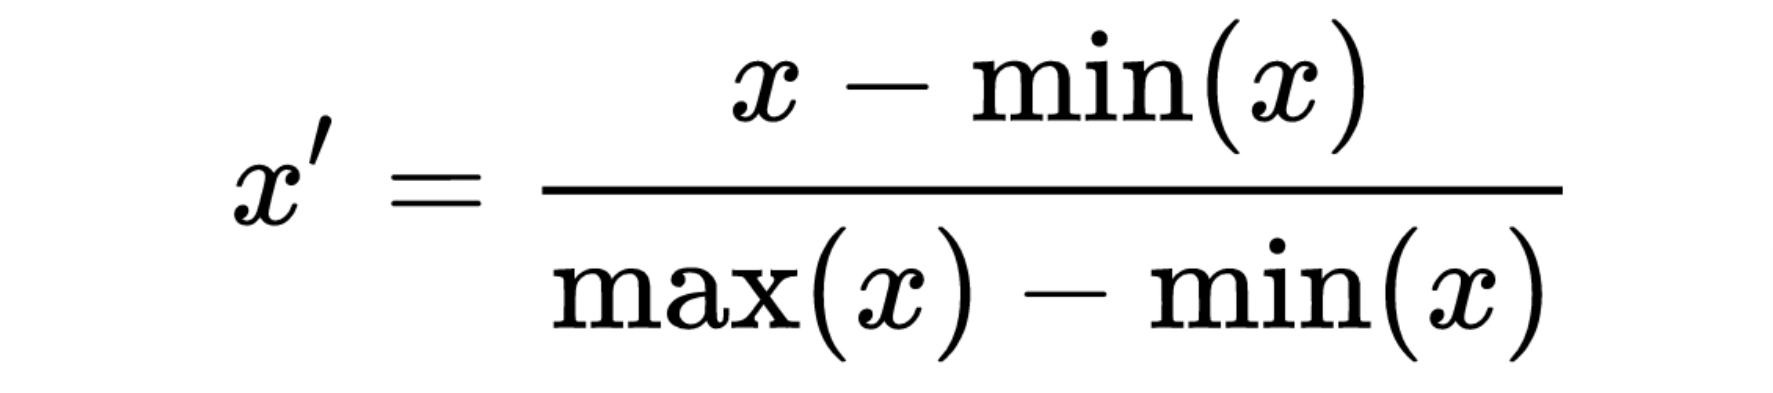

In [ ]:
from sklearn import preprocessing

data_unscaled = data.values
data_scaled = preprocessing.MinMaxScaler().fit_transform(data_unscaled)

In [ ]:
pd.DataFrame(data_scaled, columns=data.columns).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.333333,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.000000,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.000000,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.000000,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.000000,0.333333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Hasilnya adalah DataFrame baru yang berisi fitur-fitur deskriptif yang telah diukur ulang. Setiap nilai dalam fitur sekarang berada dalam rentang 0 hingga 1.

Penerapan Min-Max Scaling ini memungkinkan perbandingan yang lebih baik antara variabel-variabel dengan skala nilai yang berbeda. Hal ini dapat membantu algoritma Machine Learning untuk bekerja lebih efisien dan mempercepat waktu pemrosesan. Perlu dicatat bahwa fitur-fitur biner tetap dapat dipertahankan sebagai fitur biner setelah proses scaling.

### *Feature Selection & Ranking*

Dalam tahap ini, digunakan metode klasifikasi 1-nearest neighbor sebagai pembungkus (wrapper) untuk membandingkan kinerja dua metode seleksi fitur: F-Score dan Random Forest Importance. Evaluasi dilakukan menggunakan strategi stratified 5-fold cross validation dengan 3 pengulangan untuk mendapatkan penilaian yang konsisten.

K-fold cross validation merupakan metode validasi model yang membagi data menjadi sejumlah subset atau fold. Stratified 5-fold cross-validation berarti dataset dibagi menjadi 5 lipatan (fold) yang menjaga proporsi kelas yang seimbang, dan proses ini diulang sebanyak 3 kali.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=999)

Dengan menggunakan model klasifikasi dan metode validasi silang ini, kita dapat melakukan evaluasi terhadap dua metode seleksi fitur: F-Score dan Random Forest Importance. Evaluasi ini membantu kita memahami seberapa baik suatu fitur dapat membantu model dalam membuat prediksi yang akurat.

#### Full Set of Features
Sebelum menerapkan metode seleksi fitur, kami menilai kinerja menggunakan semua fitur deskriptif dalam dataset.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results_full = cross_val_score(estimator=clf,
                             X=data_scaled,
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_full.mean()

0.5588292210933721

Skor Area Under the Curve (AUC) untuk model dengan semua fitur adalah 0,559. Nilai AUC yang rendah mengindikasikan bahwa kinerja model dengan semua fitur tersebut tidak optimal. Kemungkinan terdapat beberapa fitur yang tidak relevan atau memiliki dampak yang kurang signifikan terhadap prediksi kelas target. Oleh karena itu, langkah selanjutnya adalah menerapkan metode seleksi fitur untuk meningkatkan kinerja model dengan menghilangkan fitur-fitur yang kurang informatif atau redundan.

#### *Random Forest Importance*

Dilakukan penggunaan metode Random Forest Importance (RFI) untuk memilih fitur-fitur yang memiliki kontribusi tinggi terhadap prediksi. Langkah-langkahnya adalah sebagai berikut:

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

np.random.seed(999)

## Inisialisasi Model Random Forest
model_rfi = RandomForestClassifier(n_estimators=100)

## Pelatihan Model
model_rfi.fit(data_scaled, target)

RandomForestClassifier()

*   Model Random Forest diinisialisasi dengan 100 pohon keputusan (n_estimators=100).
*   Model dilatih dengan menggunakan data yang telah diukur ulang (data_scaled) dan target kelas (target).


In [ ]:
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:10]

best_features_rfi = data.columns[fs_indices_rfi].values
print(best_features_rfi)

feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print(feature_importances_rfi)

['G2' 'G1' 'failures' 'absences' 'goout' 'age' 'Walc' 'Medu' 'health'
 'Fedu']
[0.32580092 0.21010821 0.03737166 0.0351079  0.02835799 0.02779206
 0.0200687  0.01891441 0.01875449 0.01789372]


Hasil di atas menunjukkan 10 fitur teratas yang memiliki kontribusi paling tinggi menurut metode RFI, beserta bobot kontribusi masing-masing fitur.

In [ ]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=data_scaled[:, fs_indices_rfi],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_rfi.mean()

0.7551040154813741

Skor Area Under the Curve (AUC) untuk model dengan menggunakan 10 fitur teratas yang dipilih oleh metode Random Forest Importance adalah 0,755. Hal ini menunjukkan peningkatan kinerja dibandingkan dengan model yang menggunakan semua fitur deskriptif (AUC sebelumnya adalah 0,559). Seleksi fitur dengan RFI membantu meningkatkan efisiensi dan kinerja model.

#### *F-Score*

In [ ]:
from sklearn import feature_selection as fs
np.random.seed(999)

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=10)
fs_fit_fscore.fit_transform(data_scaled, target)

fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:10]

best_features_fscore = data.columns[fs_indices_fscore].values
print(best_features_fscore)

feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['G2' 'G1' 'failures' 'goout' 'age' 'higher' 'Medu' 'Fedu'
 'guardian_other' 'schoolsup']
[436.49071136 311.54923327  50.59784769  13.67866917  13.10596752
  10.02388849   5.30392518   4.64300582   4.63604257   3.95849636]


In [ ]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=data_scaled[:, fs_indices_fscore],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_fscore.mean()

0.8191582002902759

Skor Area Under the Curve (AUC) untuk model dengan menggunakan 10 fitur teratas yang dipilih oleh metode F-Score adalah 0,819. Hal ini menunjukkan peningkatan yang signifikan dalam kinerja model dibandingkan dengan model yang menggunakan semua fitur deskriptif (AUC sebelumnya adalah 0,559). Seleksi fitur dengan F-Score membantu meningkatkan keakuratan dan efisiensi model.

Dengan demikian, diputuskan untuk melanjutkan dengan 10 fitur teratas yang dipilih oleh F-Score untuk analisis lebih lanjut. Dalam visualisasi berikut, terlihat bahwa kepentingan fitur menurun tajam setelah 2 fitur teratas. Keberartian menjadi sangat marginal hingga fitur terakhir

<Axes: xlabel='Feature', ylabel='Importance'>

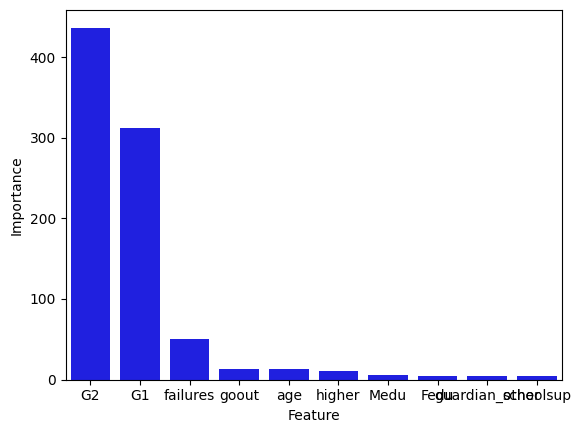

In [ ]:
feature_ranking = pd.DataFrame({'Feature': best_features_fscore,
                                'Importance': list(feature_importances_fscore)},
                               columns=['Feature', 'Importance'])
import seaborn as sns
sns. barplot(x="Feature",y="Importance",
            color='blue',data=feature_ranking)

### *Train-Test Splitting*

Dataset ini dibagi menjadi data pelatihan dan pengujian dengan rasio pembagian 70:30 dengan stratifikasi:

* Pelatihan (70%): X_train (deskriptif), y_train (target).
* Pengujian (30%): X_test (deskriptif), y_test (target).

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_scaled,
                                                 target.values,
                                                 test_size=0.3,
                                                 random_state=999,
                                                 stratify=target.values)
print(X_train.shape)
print(X_test.shape)

(276, 45)
(119, 45)


Jumlah baris dan kolom dari masing-masing set dapat dilihat dari output di atas.

Selanjutnya, dibuat X_train_10 dan X_test_10 yang memiliki baris sampel yang sama dengan X_train dan X_test, tetapi hanya memiliki 10 fitur teratas yang dipilih oleh F-Score dari proses seleksi fitur sebelumnya.

In [ ]:
X_train_10 = pd.DataFrame(X_train, columns=data.columns)
X_train_10 = X_train_10[best_features_fscore].values
X_test_10 = pd.DataFrame(X_test, columns=data.columns)
X_test_10 = X_test_10[best_features_fscore].values
print(X_train_10.shape)
print(X_test_10.shape)

(276, 10)
(119, 10)


Dengan ini, kita mendapatkan dua set data tambahan (X_train_10 dan X_test_10) yang memiliki hanya 10 fitur teratas yang dianggap paling informatif oleh metode F-Score. Ini mempersiapkan data untuk penggunaan lebih lanjut dalam pelatihan dan evaluasi model Machine Learning.

## **III. Hyperparameter Tuning**

Dalam bagian ini, dilakukan pelatihan dan penyempurnaan model berdasarkan 276 baris data pelatihan. Hyperparameter tuning adalah proses untuk menentukan kombinasi optimal dari hyperparameter pada model machine learning untuk meningkatkan performanya. Proses hyperparameter tuning biasanya melibatkan banyak percobaan yang dilakukan secara berulang dengan berbagai kombinasi nilai hyperparameter. Nantinya kita akan memilih kombinasi yang bisa menghasilkan performa model terbaik.

Selanjutnya, kinerja model dibandingkan menggunakan fitur lengkap dan hanya 10 fitur teratas. Setiap model dievaluasi dengan menggunakan stratified 5-fold cross-validation dengan 3 pengulangan untuk penyetelan hiperparameter.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits = 5,n_repeats=3,random_state=999)

### *1. K-Nearest Neighbors*

Kami menerapkan grid search untuk penyetelan hyperparameter dalam pipeline dan dilakukan pelatihan model KNN dengan berbagai jumlah tetangga terdekat (k-nearest neighbors) dan jenis jarak yang berbeda.

In [ ]:
params_knn = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'p': [1, 2]}
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=params_knn,
                      cv=cv_method,
                      verbose=1,
                      scoring='roc_auc')

In [ ]:
gs_knn.fit(X_train, y_train)
print(gs_knn.best_params_)
print(gs_knn.best_score_)
knn_best = gs_knn.best_estimator_
print(knn_best)

Fitting 15 folds for each of 28 candidates, totalling 420 fits
{'n_neighbors': 15, 'p': 1}
0.7461066329487382
KNeighborsClassifier(n_neighbors=15, p=1)


Model KNN optimal berdasarkan fitur lengkap memiliki skor AUC rata-rata sebesar 0,746 dengan 15 tetangga terdekat dan menggunakan jarak Manhattan.

In [ ]:
gs_knn.fit(X_train_10, y_train)
print(gs_knn.best_params_)
print(gs_knn.best_score_)
knn_best10 = gs_knn.best_estimator_
print(knn_best10)

Fitting 15 folds for each of 28 candidates, totalling 420 fits
{'n_neighbors': 14, 'p': 1}
0.9258627048100733
KNeighborsClassifier(n_neighbors=14, p=1)


Model KNN optimal berdasarkan 10 fitur teratas memiliki skor AUC rata-rata sebesar 0,925 dengan 14 tetangga terdekat dan menggunakan jarak Manhattan.

Secara umum, kinerja model KNN tampaknya telah meningkat setelah seleksi fitur.

### *2. Decision Tree*

Untuk menemukan model Decision Tree yang optimal, dilakukan grid search dengan memasukkan berbagai parameter seperti kriteria (indeks gini dan entropy), kedalaman maksimum, dan jumlah minimum sampel untuk split.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9,10],
             'min_samples_split':[2,3,4,5]}

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=999),
                      param_grid=params_dt,
                      cv=cv_method,
                      verbose=1,
                      scoring='roc_auc')

In [ ]:
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)
dt_best = gs_dt.best_estimator_
print(dt_best)

Fitting 15 folds for each of 64 candidates, totalling 960 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
0.9473526157736685
DecisionTreeClassifier(max_depth=3, random_state=999)


Model Decision Tree optimal berdasarkan fitur lengkap memiliki skor AUC rata-rata sebesar 0,947 dengan menggunakan kriteria indeks gini. Model ini memiliki kedalaman maksimum 3 dan nilai pemisahan minimum sebanyak 2 sampel.

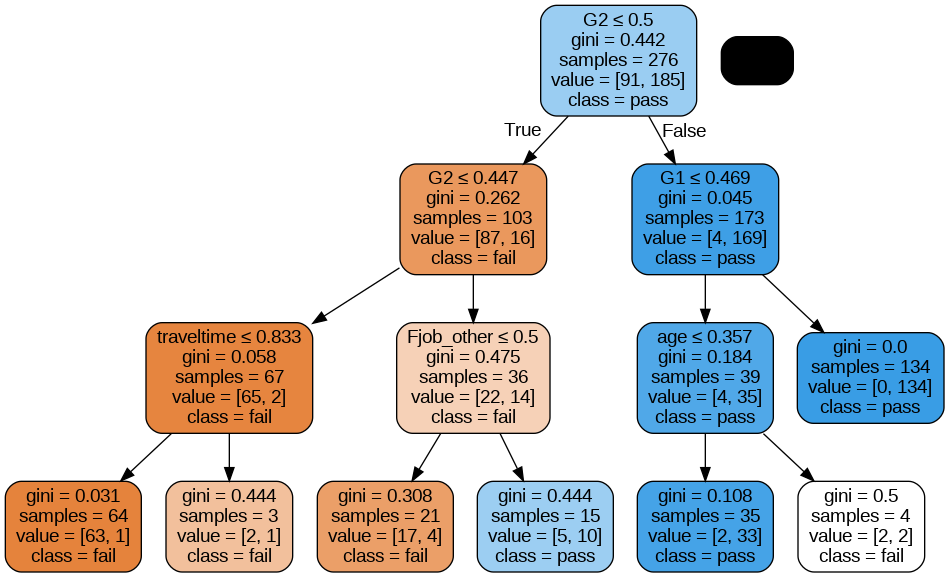

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Visualisasi model Decision Tree dengan fitur lengkap
dot_data_full = export_graphviz(dt_best, out_file=None,
                                feature_names=data.columns,
                                class_names=['fail', 'pass'],
                                filled=True, rounded=True,
                                special_characters=True)
graph_full = pydotplus.graph_from_dot_data(dot_data_full)
Image(graph_full.create_png())


In [ ]:
gs_dt.fit(X_train_10, y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)
dt_best10 = gs_dt.best_estimator_
print(dt_best10)

Fitting 15 folds for each of 64 candidates, totalling 960 fits
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
0.9636057109741321
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=999)


Model Decision Tree optimal berdasarkan 10 fitur teratas memiliki skor AUC rata-rata sebesar 0,963 dengan menggunakan kriteria entropy. Model ini juga memiliki kedalaman maksimum 3 dan nilai pemisahan minimum sebanyak 2 sampel.

Tampaknya kinerja model Decision Tree tidak mengalami peningkatan signifikan setelah seleksi fitur. Meskipun demikian, hasil uji t berpasangan nantinya dapat memberikan konfirmasi lebih lanjut.

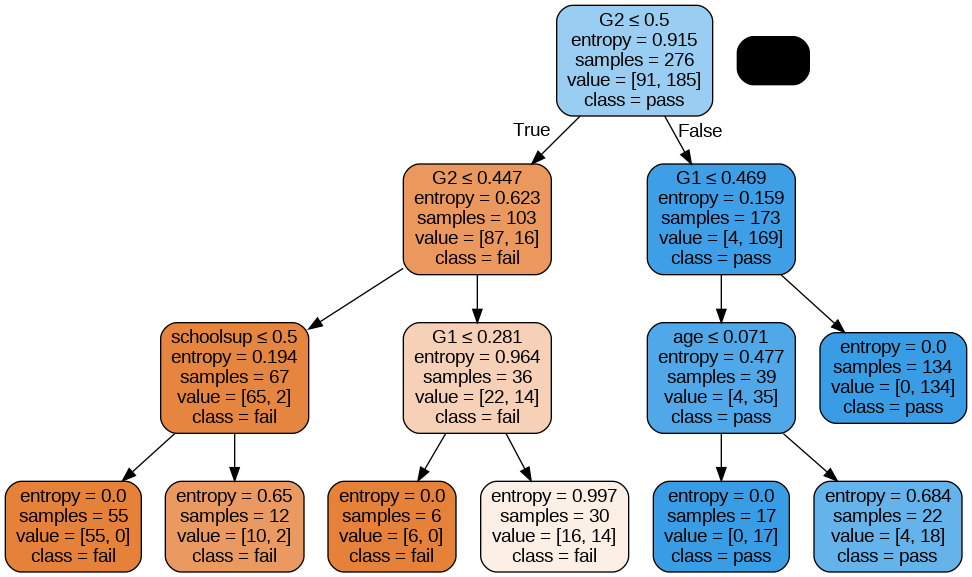

In [ ]:
# Visualisasi model Decision Tree dengan 10 fitur teratas
dot_data_10 = export_graphviz(dt_best10, out_file=None,
                              feature_names=best_features_fscore,
                              class_names=['fail', 'pass'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_10 = pydotplus.graph_from_dot_data(dot_data_10)
Image(graph_10.create_png())


### *3. (Gaussian) Naive Bayes*

Dalam pemilihan model Gaussian Naive Bayes, kami mencoba berbagai nilai untuk parameter var_smoothing dengan rentang dari 1 hingga 10^-9 menggunakan 100 nilai yang berbeda. Sebelum data dimasukkan ke dalam algoritma, kami melakukan transformasi daya menggunakan PowerTransformer untuk memastikan bahwa setiap fitur deskriptif mengikuti distribusi Gaussian.

In [ ]:
from sklearn.preprocessing import PowerTransformer
X_train_trans = PowerTransformer().fit_transform(X_train)
X_train_10_trans = PowerTransformer().fit_transform(X_train_10)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(999)
params_nb ={'var_smoothing': np.logspace(0,-9,num=100)}
gs_nb =GridSearchCV(estimator=GaussianNB(),
                   param_grid=params_nb,
                   cv=cv_method,
                   verbose=1,
                   scoring='roc_auc')

In [ ]:
gs_nb.fit(X_train_trans, y_train)
print(gs_nb.best_params_)
print(gs_nb.best_score_)
nb_best = gs_nb.best_estimator_
print(nb_best)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 1.0}
0.8953374427058638
GaussianNB(var_smoothing=1.0)


In [ ]:
gs_nb.fit(X_train_10_trans, y_train)
print(gs_nb.best_params_)
print(gs_nb.best_score_)
nb_best10 = gs_nb.best_estimator_
print(nb_best10)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 1.0}
0.9344660449923609
GaussianNB(var_smoothing=1.0)


Model Naive Bayes optimal berdasarkan fitur lengkap menghasilkan skor AUC rata-rata sebesar 0,895, sementara model optimal berdasarkan 10 fitur teratas memiliki skor AUC rata-rata sebesar 0,934.

*Catatan:*
*   Penggunaan PowerTransformer bertujuan untuk menjaga asumsi distribusi Gaussian pada setiap fitur.
*   Nilai optimal untuk var_smoothing pada kedua model adalah 1.0.
*   Skor AUC yang tinggi menunjukkan bahwa model Naive Bayes cukup baik dalam memisahkan kelas target.

## **IV. Performance Comparison**

Dalam bagian ini, kami memasukkan model-model optimal dari analisis di atas pada data pengujian dengan stratified 5-fold cross validation dan 3 pengulangan. Kemudian, kami membandingkan kinerja model dengan uji t berpasangan:
*   DT (full features) vs. DT (top 10 features)
*   KNN (full features) vs. KNN (top 10 features)
*   NB (full features) vs. NB (top 10 features)

Full Features:
* DT vs. KNN
* DT vs. NB
* KNN vs. NB

Top 10 Features:
* DT vs. KNN
* DT vs. NB
* KNN vs. NB

In [ ]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,
                                          random_state=999)

In [ ]:
cv_results_knn = cross_val_score(estimator=knn_best,
                                 X=X_test,
                                 y=y_test,
                                 cv=cv_method_ttest,
                                 scoring='roc_auc')
cv_results_knn_10 = cross_val_score(estimator=knn_best10,
                                 X=X_test_10,
                                 y=y_test,
                                 cv=cv_method_ttest,
                                 scoring='roc_auc')
cv_results_dt = cross_val_score(estimator=dt_best,
                                X=X_test,
                                y=y_test,
                                cv=cv_method_ttest,
                                scoring='roc_auc')
cv_results_dt_10 = cross_val_score(estimator=dt_best10,
                                X=X_test_10,
                                y=y_test,
                                cv=cv_method_ttest,
                                scoring='roc_auc')
cv_results_nb = cross_val_score(estimator=nb_best,
                                X=X_test,
                                y=y_test,
                                cv=cv_method_ttest,
                                scoring='roc_auc')
cv_results_nb_10 = cross_val_score(estimator=nb_best10,
                                X=X_test_10,
                                y=y_test,
                                cv=cv_method_ttest,
                                scoring='roc_auc')

# Menampilkan hasil
print("KNN(full features):",cv_results_knn.mean())
print("KNN(top 10 features):",cv_results_knn_10.mean())
print("DT(full features):",cv_results_dt.mean())
print("DT(top 10 features):",cv_results_dt_10.mean())
print("NB(full features):",cv_results_nb.mean())
print("NB(top 10 features):",cv_results_nb_10.mean())

KNN(full features): 0.773623511904762
KNN(top 10 features): 0.8858630952380953
DT(full features): 0.9006324404761905
DT(top 10 features): 0.9235491071428572
NB(full features): 0.7820684523809524
NB(top 10 features): 0.8751488095238095


In [ ]:
from scipy import stats
# Uji t berpasangan
print(stats.ttest_rel(cv_results_dt, cv_results_dt_10))
print(stats.ttest_rel(cv_results_nb, cv_results_nb_10))
print(stats.ttest_rel(cv_results_knn, cv_results_knn_10))

TtestResult(statistic=-1.0041795602797645, pvalue=0.33233349271327284, df=14)
TtestResult(statistic=-5.61981096712023, pvalue=6.320482328814713e-05, df=14)
TtestResult(statistic=-6.704555596728446, pvalue=1.0030814802479721e-05, df=14)


Hasil di atas menunjukkan bahwa semua model memiliki kinerja yang signifikan lebih baik dengan 10 fitur teratas yang dipilih oleh F-Score daripada dengan fitur lengkap, pada tingkat signifikansi 5%.

In [ ]:
print(stats.ttest_rel(cv_results_dt, cv_results_knn))
print(stats.ttest_rel(cv_results_dt, cv_results_nb))
print(stats.ttest_rel(cv_results_knn, cv_results_nb))

TtestResult(statistic=4.568556865025723, pvalue=0.00043791949885664083, df=14)
TtestResult(statistic=3.750528746911659, pvalue=0.0021511371352263115, df=14)
TtestResult(statistic=-0.6342744322951159, pvalue=0.5361289676793513, df=14)


Untuk model berdasarkan fitur lengkap, model Decision Tree memiliki kinerja yang signifikan lebih baik daripada model KNN dan Naive Bayes, pada tingkat signifikansi 5%. Model KNN dan Naive Bayes memiliki kinerja yang serupa.

In [ ]:
print(stats.ttest_rel(cv_results_dt_10, cv_results_knn_10))
print(stats.ttest_rel(cv_results_dt_10, cv_results_nb_10))
print(stats.ttest_rel(cv_results_knn_10, cv_results_nb_10))

TtestResult(statistic=1.3793372994533835, pvalue=0.18942708881959042, df=14)
TtestResult(statistic=2.0009610908085924, pvalue=0.06517365862229056, df=14)
TtestResult(statistic=1.0702084304709418, pvalue=0.30263012921931015, df=14)


Untuk model berdasarkan 10 fitur teratas yang dipilih oleh F-Score, model KNN memiliki kinerja yang signifikan lebih baik daripada model Naive Bayes. Decision Tree memiliki kinerja yang serupa baik dibandingkan dengan model KNN maupun Naive Bayes. Saat ini sulit untuk memutuskan model yang optimal hanya dengan skor AUC tersedia, tetapi berdasarkan perbandingan kinerja di atas, jelas bahwa semua model dengan 10 fitur teratas memberikan hasil yang lebih baik pada data uji. Oleh karena itu, untuk evaluasi lebih lanjut tentang akurasi, presisi, recall, F1 Score, dan confusion matrix, kami hanya mempertimbangkan model dengan 10 fitur teratas.

In [ ]:
pred_knn = gs_knn.predict(X_test_10)
pred_dt = gs_dt.predict(X_test_10)
X_test_10_trans = PowerTransformer().fit_transform(X_test_10)
pred_nb = gs_nb.predict(X_test_10_trans)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk membuat dan menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

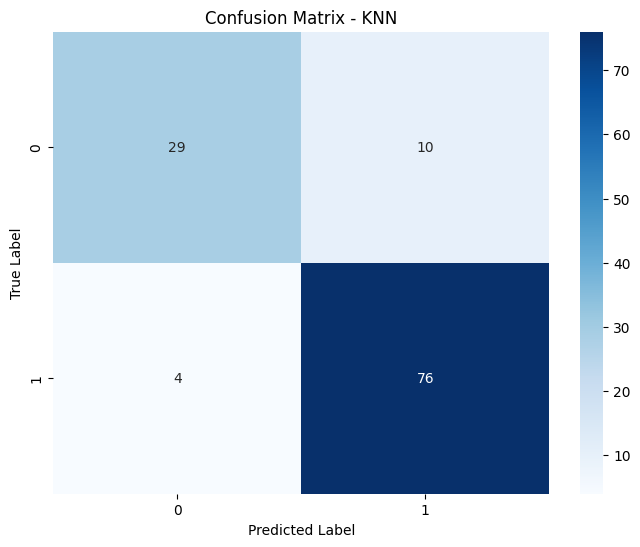


KNN: Classification report
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.88      0.95      0.92        80

    accuracy                           0.88       119
   macro avg       0.88      0.85      0.86       119
weighted avg       0.88      0.88      0.88       119



In [ ]:
from sklearn import metrics
# Visualisasi Confusion Matrix KNN
plot_confusion_matrix(y_test, pred_knn, classes=['0', '1'], title='Confusion Matrix - KNN')
print("\nKNN: Classification report")
print(metrics.classification_report(y_test, pred_knn))

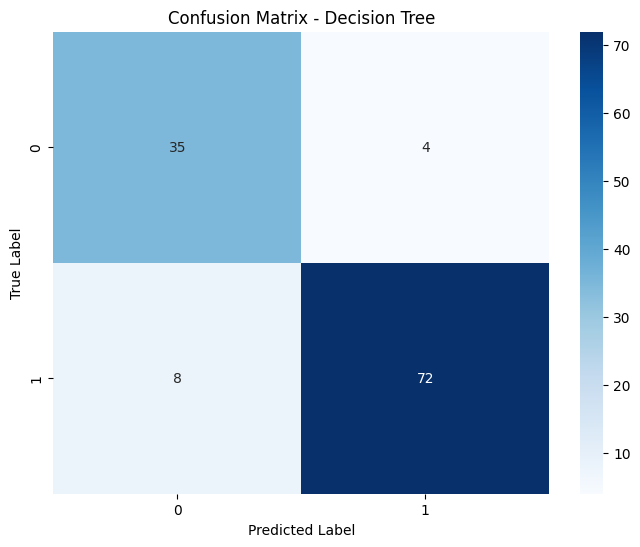


DT: Classification report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.95      0.90      0.92        80

    accuracy                           0.90       119
   macro avg       0.88      0.90      0.89       119
weighted avg       0.90      0.90      0.90       119



In [ ]:
# Visualisasi Confusion Matrix Contoh penggunaan untuk Decision Tree
plot_confusion_matrix(y_test, pred_dt, classes=['0', '1'], title='Confusion Matrix - Decision Tree')
print("\nDT: Classification report")
print(metrics.classification_report(y_test, pred_dt))

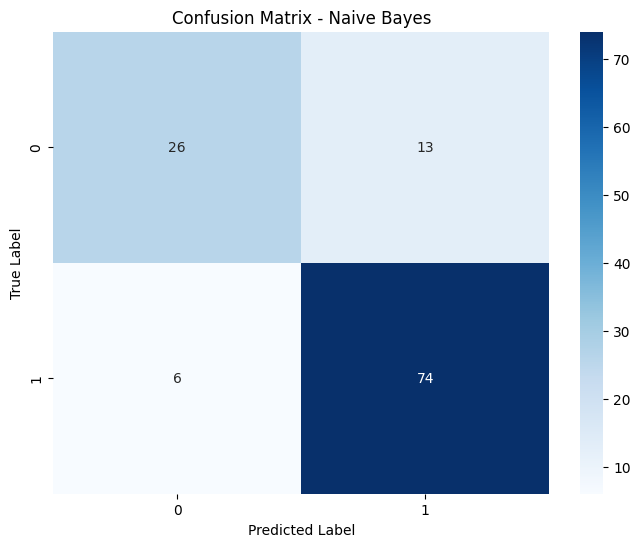


NB: Classification report
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        39
           1       0.85      0.93      0.89        80

    accuracy                           0.84       119
   macro avg       0.83      0.80      0.81       119
weighted avg       0.84      0.84      0.84       119



In [ ]:
# Visualisasi Confusion Matrix Contoh penggunaan untuk Naive Bayes
plot_confusion_matrix(y_test, pred_nb, classes=['0', '1'], title='Confusion Matrix - Naive Bayes')
print("\nNB: Classification report")
print(metrics.classification_report(y_test, pred_nb))

Jika sekolah ingin memprediksi siswa yang kemungkinan gagal dalam mata pelajaran Matematika untuk memberikan dukungan lebih awal kepada siswa-siswi ini, maka recall "0" (fail) adalah metrik penting yang perlu dipertimbangkan dalam kasus ini. Model Decision Tree adalah yang paling optimal. Namun, jika sekolah ingin memprediksi dengan benar siswa yang kemungkinan lulus agar dapat memilih siswa-siswi yang baik untuk mengikuti kompetisi Matematika, maka recall "1" (pass) harus ditekankan. Oleh karena itu, model KNN bisa menjadi yang paling optimal. Secara umum, model Decision Tree dapat dianggap sebagai model terbaik dalam hal F1-score karena skor ini adalah mean harmonik tertimbang dari precision dan recall.

## **V. Summary**

Model *Decision Tree* berdasarkan 10 fitur teratas yang dipilih oleh *F-Score* adalah model terbaik untuk prediksi dalam analisis ini, di bawah pendekatan *hyperparameter tuning* terbatas dan pemilihan fitur. Meskipun tidak ada cukup bukti statistik untuk menunjukkan bahwa model *Decision Tree* ini tampil lebih baik daripada model *KNN* dan *Naive Bayes* lainnya, pada tingkat signifikansi 5%, ia menghasilkan skor *AUC* tertinggi (0,923) dan skor F1 (0,9). Secara umum, semua model dengan hanya 10 fitur teratas yang dipilih oleh *F-Score* tampil signifikan lebih baik daripada yang memiliki fitur lengkap, pada tingkat signifikansi 5%.

## **Analisis Univariat, Bivariat, Multivariat**

### **Univariate**

Analisis univariat adalah teknik dasar dalam menganalisis data. Teknik ini digunakan ketika kita ingin memahami informasi yang terkandung dalam satu variabel tanpa mempertimbangkan hubungan sebab-akibat. Dengan kata lain, analisis univariat membantu kita menggambarkan karakteristik tunggal dari suatu variabel tanpa memperhatikan pengaruh variabel lainnya.

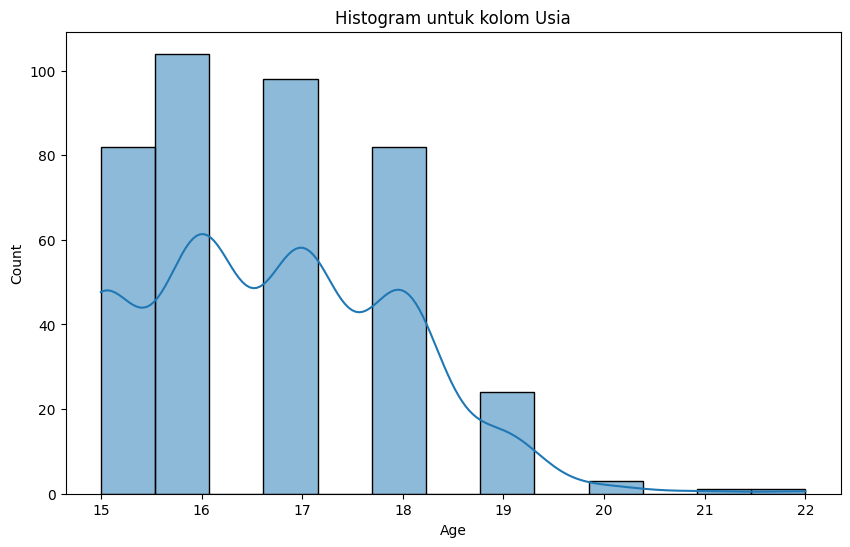

In [ ]:
# Histogram untuk variabel numerik kontinu
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Histogram untuk kolom Usia')
plt.xlabel('Age')
plt.show()

Terlihat bahwa usia siswa siswi paling banyak adalah 16 tahun.

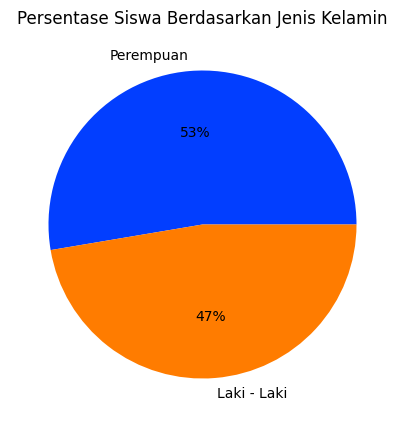

In [ ]:
# Countplot untuk variabel kategorikal
plt.figure(figsize=(5, 5))
palette_color = sns.color_palette('bright')
keys = ['Perempuan','Laki - Laki' ]
plt.pie(data['sex'].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Persentase Siswa Berdasarkan Jenis Kelamin')
plt.show()

### **Bivariat**

Analisis bivariat merupakan tahap analisis yang lebih mendalam dibandingkan analisis univariat. Saat kita memiliki dua variabel dalam satu set data dan ingin membandingkan keduanya, analisis bivariat menjadi pilihan tepat. Dengan menggunakan teknik ini, peneliti dapat melakukan pemahaman yang lebih rinci terkait hubungan atau perbandingan antara dua variabel tersebut dalam kumpulan data yang dianalisis.

Text(0.5, 1.0, 'Hubungan G2 (Grade 2) dengan Target')

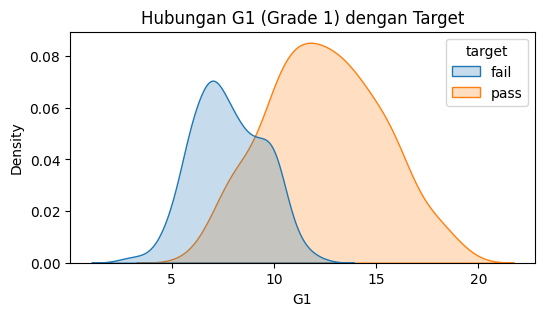

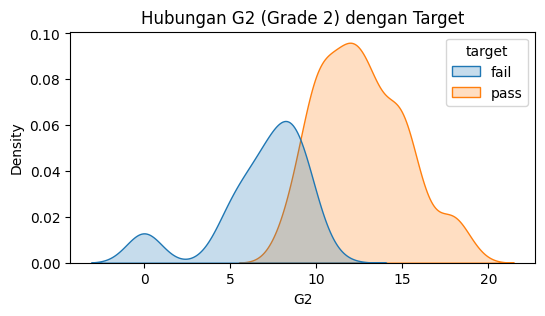

In [ ]:
# Visualisasi Bivariat

# Hubungan G1 (Grade 1) dengan Target
plt.figure(figsize=(6,3))
sns.kdeplot(data=math, x='G1',hue='target',fill=True)
plt.title('Hubungan G1 (Grade 1) dengan Target')

# Hubungan G2 (Grade 2) dengan Target
plt.figure(figsize=(6,3))
sns.kdeplot(data=math, x='G2',hue='target',fill=True)
plt.title('Hubungan G2 (Grade 2) dengan Target')

Hubungan Grade 1 dan 2 berbanding lurus dengan target. Jika nilai sebelumnya tinggi maka kemungkinan nilai ujian selanjutnya juga akan tinggi (pass).

Text(0.5, 1.0, 'Hubungan Study time dengan Target')

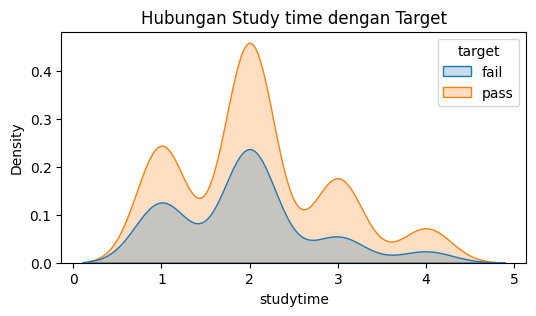

In [ ]:
# Hubungan Study time dengan Target
plt.figure(figsize=(6,3))
sns.kdeplot(data=math, x='studytime',hue='target',fill=True)
plt.title('Hubungan Study time dengan Target')

Study time tidak terlalu kuat mempengaruhi target (pass or fail) nilai matematika

### **Multivariat**

Analisis multivariat merupakan teknik analisis statistik yang lebih kompleks, digunakan ketika terdapat lebih dari dua variabel dalam suatu kumpulan data. Dalam konteks ini, teknik analisis ini memungkinkan peneliti untuk mengeksplorasi dan memahami hubungan kompleks antara beberapa variabel sekaligus, membantu mengidentifikasi pola atau tren yang mungkin sulit ditemukan dengan menggunakan analisis yang lebih sederhana.

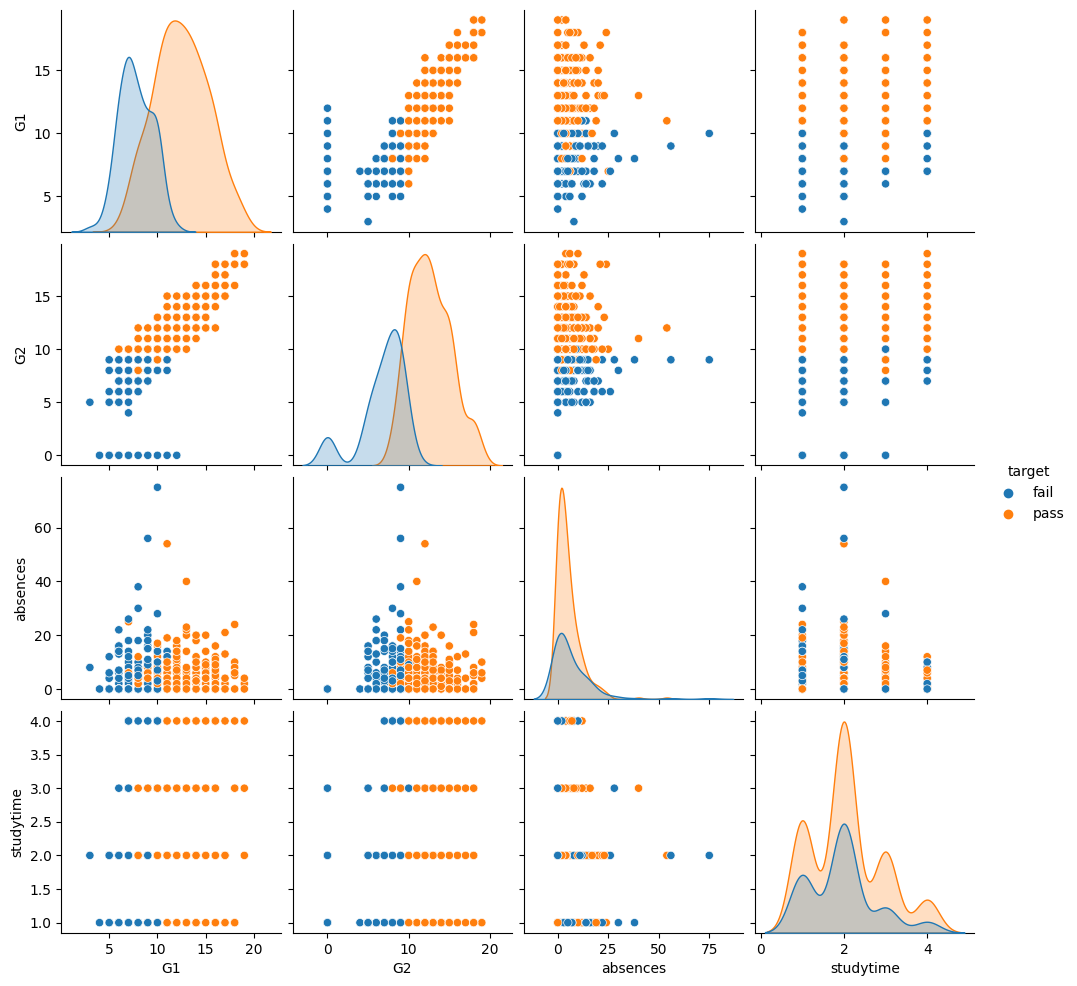

In [ ]:
sns.pairplot(data=math[['G1', 'G2', 'absences', 'studytime', 'target']],hue='target')
plt.show()

## **VI. References**

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

https://lp2m.uma.ac.id/2023/01/28/data-kategorikal-definisi-jenis-fitur-dan-contoh/

https://dqlab.id/digital-transformation-kenali-macam-macam-data-dalam-ilmu-data-science

https://ilmudatapy.com/proses-data-cleaning/

https://ilmudatapy.com/menangani-missing-values/

https://www.trivusi.web.id/2022/09/normalisasi-data.html

https://androidkt.com/how-to-scale-data-to-range-using-minmax-normalization/

https://esairina.medium.com/berbagai-metode-validasi-model-klasifikasi-machine-learning-yang-wajib-diketahui-part-1-bb0dd3c694ba

https://dqlab.id/machine-learning-model-and-hyperparameter-tuning

https://faiqazminurfaizi.medium.com/end-to-end-belajar-algoritma-machine-learning-decision-tree-855bdca88833

https://learningbox.coffeecup.com/05_1_decisiontree.html

https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173